### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under $20), coffee houses, carry out & take away, bar, and more expensive restaurants ($20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Correct the misspelled column name: 'passanger' to 'passanger'
data = data.rename(columns={'passanger': 'passenger'})

# Count the number of missing (NaN/Null) values in each column
# 'data.isna()' creates a table of True/False values (True if missing).
# '.sum()' counts the 'True' values for each column.
missing_data = data.isna().sum()

# Calculate the percentage of missing data
# We take the count of missing values (missing_data) and divide it by the
# total number of rows in the dataset (len(data)).
# We multiply by 100 to convert the decimal (e.g., 0.05) to a percentage (5.0).
# Round the result to make the data easier to read (e.g., turns 23.45678 into 23.46).
missing_data_percentage = ((missing_data / len(data)) * 100).round(2)

missing_data_percentage

destination              0.00
passenger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop the 'car' column due to over 99% missing values
if 'car' in data.columns:
    data = data.drop(columns=['car'])
    print("\nDropped 'car' column due to high missing value percentage.")

# Fill other (much lower %) missing values with the mode
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

print("\nRemaining missing values after handling missing data:", data.isnull().sum().sum())


Dropped 'car' column due to high missing value percentage.

Remaining missing values after handling missing data: 0


4. What proportion of the total observations chose to accept the coupon?

In [6]:
# Select the column labeled Y, where 1 represents a user accepting the coupon and 0 represents a rejection.
# Calculate the average(mean) of that column. Because the data is binary (0s and 1s), the mathematical average equals the acceptance rate.
acceptance_rate = data['Y'].mean().round(2)
print(f"\nProportion of accepted coupons: {acceptance_rate}")


Proportion of accepted coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

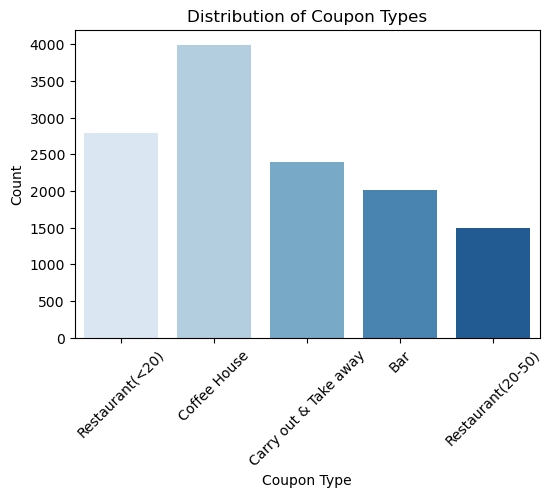

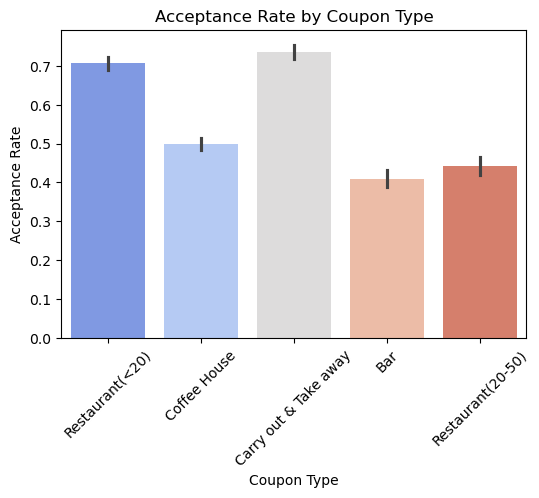

In [7]:
# Bar plot to visualize the distribution of coupon types.
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='coupon', hue='coupon',palette='Blues')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('images/coupon_distribution.png')

# Bar plot to visualize the acceptance rate by coupon types.
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='coupon', y='Y', hue='coupon',palette='coolwarm')
plt.title('Acceptance Rate by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.savefig('images/coupon_acceptance_rate.png')

6. Use a histogram to visualize the temperature column.

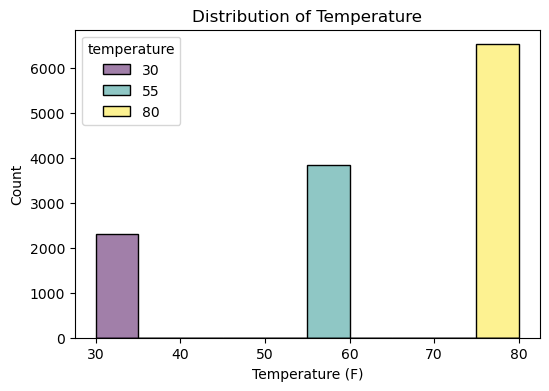

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='temperature', bins=10, hue='temperature',palette='viridis') # discrete values, so bins=10 is safe
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.savefig('images/temperature_histogram.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_data = data[data['coupon'] == 'Bar']
bar_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [10]:
# Calculate the acceptance rate for bar coupons, same as earlier using mean.
bar_acceptance_rate = bar_data['Y'].mean().round(2)
print(f"\nProportion of accepted bar coupons: {bar_acceptance_rate}")


Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Inspect the unique values in the 'Bar' column to verify categories
print("Unique values in 'Bar' column:", bar_data['Bar'].unique())

# Define the groups based on the 'Bar' column values
# 3 or fewer: 'never', 'less1', '1~3'
# More than 3: '4~8', 'gt8'

list_3_or_fewer = ['never', 'less1', '1~3']
list_more_than_3 = ['4~8', 'gt8']

# Create the two groups
group_3_or_fewer = bar_data[bar_data['Bar'].isin(list_3_or_fewer)]
group_more_than_3 = bar_data[bar_data['Bar'].isin(list_more_than_3)]

# Calculate acceptance rates
rate_3_or_fewer = group_3_or_fewer['Y'].mean().round(2)
rate_more_than_3 = group_more_than_3['Y'].mean().round(2)

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {rate_3_or_fewer}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {rate_more_than_3}")

Unique values in 'Bar' column: ['never' 'less1' '1~3' 'gt8' '4~8']
Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37
Acceptance rate for those who went to a bar more than 3 times a month: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# Check unique values for age to ensure correct filtering
print("Unique ages:", bar_data['age'].unique())

# Bar frequency > 1/month: '1~3', '4~8', 'gt8'
bar_more_than_once = ['1~3', '4~8', 'gt8']

# Age > 25.
# Ages in dataset: '21', '46', '26', '31', '41', '50plus', '36', 'below21'
# 'below21' and '21' are NOT over 25.
# '26', '31', '36', '41', '46', '50plus' ARE over 25.
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

# Create boolean masks
mask_bar_freq = bar_data['Bar'].isin(bar_more_than_once)
mask_age = bar_data['age'].isin(age_over_25)

# Group 1: Bar > 1/month AND Age > 25
group1 = bar_data[mask_bar_freq & mask_age]

# Group 2: All others in the bar coupon dataset
# Note: "All others" implies the complement set within the bar_data dataframe.
group2 = bar_data[~(mask_bar_freq & mask_age)]

# Calculate acceptance rates
rate_group1 = group1['Y'].mean().round(2)
rate_group2 = group2['Y'].mean().round(2)

print(f"Acceptance rate for Group 1 (Bar > 1/month & Age > 25): {rate_group1}")
print(f"Acceptance rate for Group 2 (All others): {rate_group2}")

Unique ages: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate for Group 1 (Bar > 1/month & Age > 25): 0.7
Acceptance rate for Group 2 (All others): 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [13]:
# Create various masking conditions:

# 1) Passengers: Not a kid
# Check unique values first to be sure, but usually it is 'Kid(s)'
print("Unique passenger types:", bar_data['passenger'].unique())

# 2) We keep rows where passenger is NOT 'Kid(s)'
mask_passenger = bar_data['passenger'] != 'Kid(s)'

# 3) Occupation: Not 'Farming Fishing & Forestry'
# Check unique values for 'occupation' first to confirm if there is any overlap with farming, fishing, or forestry.
print("Unique occupation types:", bar_data['occupation'].unique())

# Mask the only type that fits:'Farming Fishing & Forestry'
mask_occupation = bar_data['occupation'] != 'Farming Fishing & Forestry'

# Combine all 3 conditions for Group 1
mask_group1 = mask_bar_freq & mask_passenger & mask_occupation

# Define Group 1 and Group 2
group1 = bar_data[mask_group1]
group2 = bar_data[~mask_group1]

# Calculate acceptance rates
rate_group1 = group1['Y'].mean().round(2)
rate_group2 = group2['Y'].mean().round(2)

print(f"Acceptance rate for Group 1 (Bar > 1/mo, No Kids, Not Farming/Fishing): {rate_group1}")
print(f"Acceptance rate for Group 2 (All others): {rate_group2}")
print(f"Count of Group 1: {len(group1)}")
print(f"Count of Group 2: {len(group2)}")

Unique passenger types: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Unique occupation types: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
Acceptance rate for Group 1 (Bar > 1/mo, No Kids, Not Farming/Fishing): 0.71
Acceptance rate for Group 2 (All others): 0.3
Count of Group 1: 551
Count of Group 2: 1466


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
# Criteria Lists
bar_more_than_once = ['1~3', '4~8', 'gt8']
cheap_rest_more_than_4 = ['4~8', 'gt8']
ages_under_30 = ['below21', '21', '26']
incomes_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Mask 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
mask_1 = (
    bar_data['Bar'].isin(bar_more_than_once) &
    (bar_data['passenger'] != 'Kid(s)') &
    (bar_data['maritalStatus'] != 'Widowed')
)

# Mask 2: go to bars more than once a month and are under the age of 30
mask_2 = (
    bar_data['Bar'].isin(bar_more_than_once) &
    bar_data['age'].isin(ages_under_30)
)

# Mask 3: go to cheap restaurants more than 4 times a month and income is less than 50K
mask_3 = (
    bar_data['RestaurantLessThan20'].isin(cheap_rest_more_than_4) &
    bar_data['income'].isin(incomes_less_than_50k)
)

# Combine masks with OR
final_mask = mask_1 | mask_2 | mask_3

# Define Groups
group_target = bar_data[final_mask]
group_others = bar_data[~final_mask]

# Calculate Acceptance Rates
rate_target = group_target['Y'].mean().round(2)
rate_others = group_others['Y'].mean().round(2)

print(f"Acceptance Rate of Target Group: {rate_target}")
print(f"Acceptance Rate of Others: {rate_others}")
print(f"Count of Target Group: {len(group_target)}")
print(f"Count of Others: {len(group_others)}")

Acceptance Rate of Target Group: 0.59
Acceptance Rate of Others: 0.3
Count of Target Group: 776
Count of Others: 1241


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

   Based on the analysis performed in the previous steps, we can formulate a strong hypothesis about the drivers who are most likely to accept bar coupons.

Hypothesis: Drivers who accept bar coupons are primarily those who already exhibit a habit of visiting bars and are in a social context that permits it (e.g., no children in the car). The acceptance is less about introducing a new behavior to a non-drinker and more about incentivizing an existing habit.

Habit seems to have a major impact on the acceptance rate:
The overall acceptance rate for bar coupons is ~41%.
However, for those who visit bars more than 3 times a month, the rate jumps to ~77%.
Even those who visit just more than once a month show a significantly higher acceptance rate compared to those who do not.

Age and Maturity play a role:
Drivers over the age of 25 who frequent bars (more than once a month) accept coupons at a rate of ~70%. This suggests that the target demographic is likely an adult population with an established social routine, rather than just college-aged students.

Social Context Matters:
Drivers who had passengers other than children (and who frequent bars) had an acceptance rate of ~71%. This indicates that bar coupons are most effective when the driver is either alone or with adult company ("Partner", "Friend(s)"), likely viewing the coupon as an opportunity for a social outing.

Economic Factors (Secondary):
The data also hinted that lower-income drivers (earning less than $50k) who frequent cheaper restaurants also have a higher propensity to accept bar coupons, suggesting a price-sensitivity component where the discount is a meaningful motivator.

Conclusion: To maximize the acceptance of bar coupons, the marketing strategy should target frequent bar-goers (at least once a month) who are over 25 and are not driving with children.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Overall Coffee House Acceptance Rate: 0.5


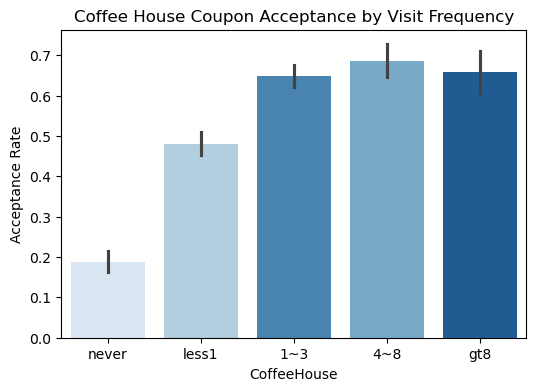

In [21]:
# I have chosen to explore the "Coffee House" coupon group, as it is the largest category in the dataset and likely to have interesting behavioral drivers similar to the Bar coupons.

# 1. Filter for Coffee House coupons
data_coffee = data[data['coupon'] == 'Coffee House']

# 2. Overall Acceptance Rate
print(f"Overall Coffee House Acceptance Rate: {data_coffee['Y'].mean().round(2)}")

# 3. Acceptance by Frequency of Visits
# Clean up the order of frequency categories for plotting
frequency_order = ['never', 'less1', '1~3', '4~8', 'gt8']
# Ensure categorical ordering
data_coffee.loc[:, 'CoffeeHouse'] = pd.Categorical(data_coffee['CoffeeHouse'], categories=frequency_order, ordered=True)

plt.figure(figsize=(6, 4))
sns.barplot(data=data_coffee, x='CoffeeHouse', y='Y', hue='CoffeeHouse', palette='Blues', order=frequency_order)
plt.title('Coffee House Coupon Acceptance by Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.savefig('images/coffee_freq_acceptance.png')

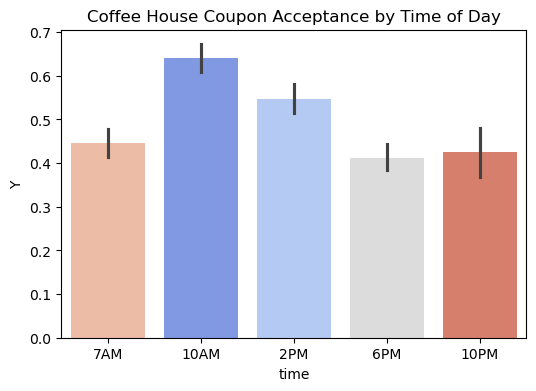

In [16]:
# 4. Acceptance by Time of Day
plt.figure(figsize=(6, 4))
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
sns.barplot(data=data_coffee, x='time', y='Y', hue='time', palette='coolwarm', order=time_order)
plt.title('Coffee House Coupon Acceptance by Time of Day')
plt.savefig('images/coffee_time_acceptance.png')

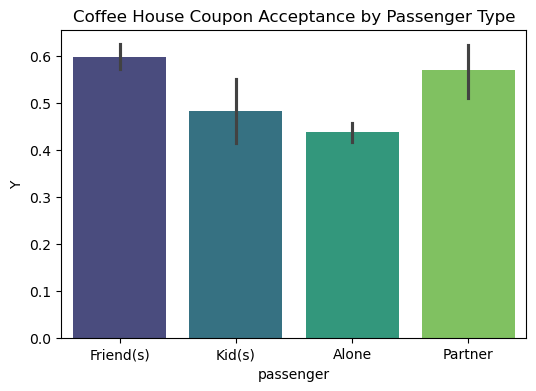

In [17]:
# 5. Acceptance by Passenger
plt.figure(figsize=(6, 4))
sns.barplot(data=data_coffee, x='passenger', y='Y', hue='passenger', palette='viridis')
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.savefig('images/coffee_passenger_acceptance.png')

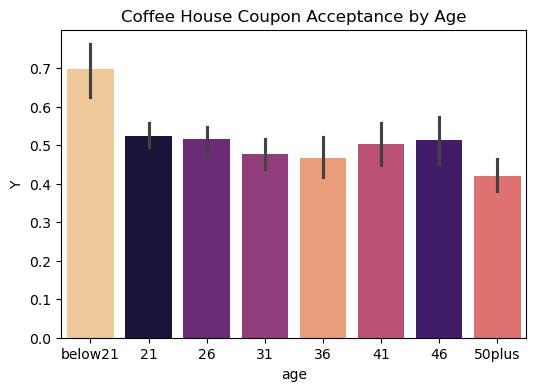

In [18]:
# 6. Acceptance by Age
plt.figure(figsize=(6, 4))
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
sns.barplot(data=data_coffee, x='age', y='Y', hue='age', palette='magma', order=age_order)
plt.title('Coffee House Coupon Acceptance by Age')
plt.savefig('images/coffee_age_acceptance.png')

In [19]:
# 7. Check intersection: Frequent visitors (1~3 or more) vs Infrequent
coffee_frequent = ['1~3', '4~8', 'gt8']
mask_frequent = data_coffee['CoffeeHouse'].isin(coffee_frequent)
print(f"Acceptance Rate (Frequent Visitors): {data_coffee[mask_frequent]['Y'].mean().round(2)}")
print(f"Acceptance Rate (Infrequent Visitors): {data_coffee[~mask_frequent]['Y'].mean().round(2)}")

Acceptance Rate (Frequent Visitors): 0.66
Acceptance Rate (Infrequent Visitors): 0.35


Observations and Hypothesis from the analysis for the Coffee House coupons above. 

1. Overall Acceptance Rate
The overall acceptance rate for Coffee House coupons is 49.92%. This is significantly higher than the Bar coupon acceptance rate (~41%).

2. Key Factors Influencing Acceptance
I analyzed several factors to determine what drives a driver to accept a coffee coupon.

A. Frequency of Visits (Strongest Predictor) Just like with bars, habit is the primary driver.
Frequent Visitors (1 or more times a month): 66.02% acceptance rate.
Infrequent Visitors (Less than once a month or never): 35.00% acceptance rate.
Insight: People who already go to coffee houses are nearly twice as likely to accept a coupon for one.

B. Time of Day
10 AM and 2 PM show the highest acceptance rates.
7 AM is surprisingly lower (perhaps people are rushing to work and can't detour?).
10 PM is the lowest, which makes sense for coffee.

C. Passenger Presence
Friend(s): Drivers with friends in the car have the highest acceptance rate (~60%).
Partner: Also high (~55%).
Alone: Lower acceptance (~45%).
Kid(s): Moderate acceptance.
Insight: Coffee is often treated as a social activity. Having friends in the car significantly increases the likelihood of a stop.

D. Age
Under 21 and 21-26 age groups have the highest acceptance rates (>50%).
Acceptance generally declines with age, dropping below 45% for those over 50.
Hypothesis & Recommendation
Hypothesis: Coffee House coupons are most effective as social facilitators for younger adults and habit reinforcers for regular coffee drinkers. They are less effective as "urgent" stops (7 AM rush) and more effective as "leisure" stops (10 AM / 2 PM breaks).

Ideal Target Profile: To maximize acceptance, target drivers who:
Already visit coffee houses at least once a month.
Are driving with friends or partners.
Are traveling mid-morning (10 AM) or mid-afternoon (2 PM).
Are under the age of 30.